In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
bank_full = pd.read_csv("bank-full.csv")

bank_full.isnull().sum()
bank_full.columns
df = pd.DataFrame(bank_full.corr())


In [9]:
#coverting the string values into numeric 
bank_full['job'] = bank_full['job'].astype('category')
bank_full['job'] = bank_full['job'].cat.codes
bank_full['marital'] = bank_full['marital'].astype('category')
bank_full['marital'] = bank_full['marital'].cat.codes
bank_full['education'] = bank_full['education'].astype('category')
bank_full['education'] = bank_full['education'].cat.codes
bank_full['default'] = bank_full['default'].astype('category')
bank_full['default'] = bank_full['default'].cat.codes
bank_full['housing'] = bank_full['housing'].astype('category')
bank_full['housing'] = bank_full['housing'].cat.codes
bank_full['loan'] = bank_full['loan'].astype('category')
bank_full['loan'] = bank_full['loan'].cat.codes
bank_full['contact'] = bank_full['contact'].astype('category')
bank_full['contact'] = bank_full['contact'].cat.codes
bank_full['month'] = bank_full['month'].astype('category')
bank_full['month'] = bank_full['month'].cat.codes
bank_full['poutcome'] = bank_full['poutcome'].astype('category')
bank_full['poutcome'] = bank_full['poutcome'].cat.codes
bank_full['y'] = bank_full['y'].astype('category')
bank_full['y'] = bank_full['y'].cat.codes


KeyError: 'job'

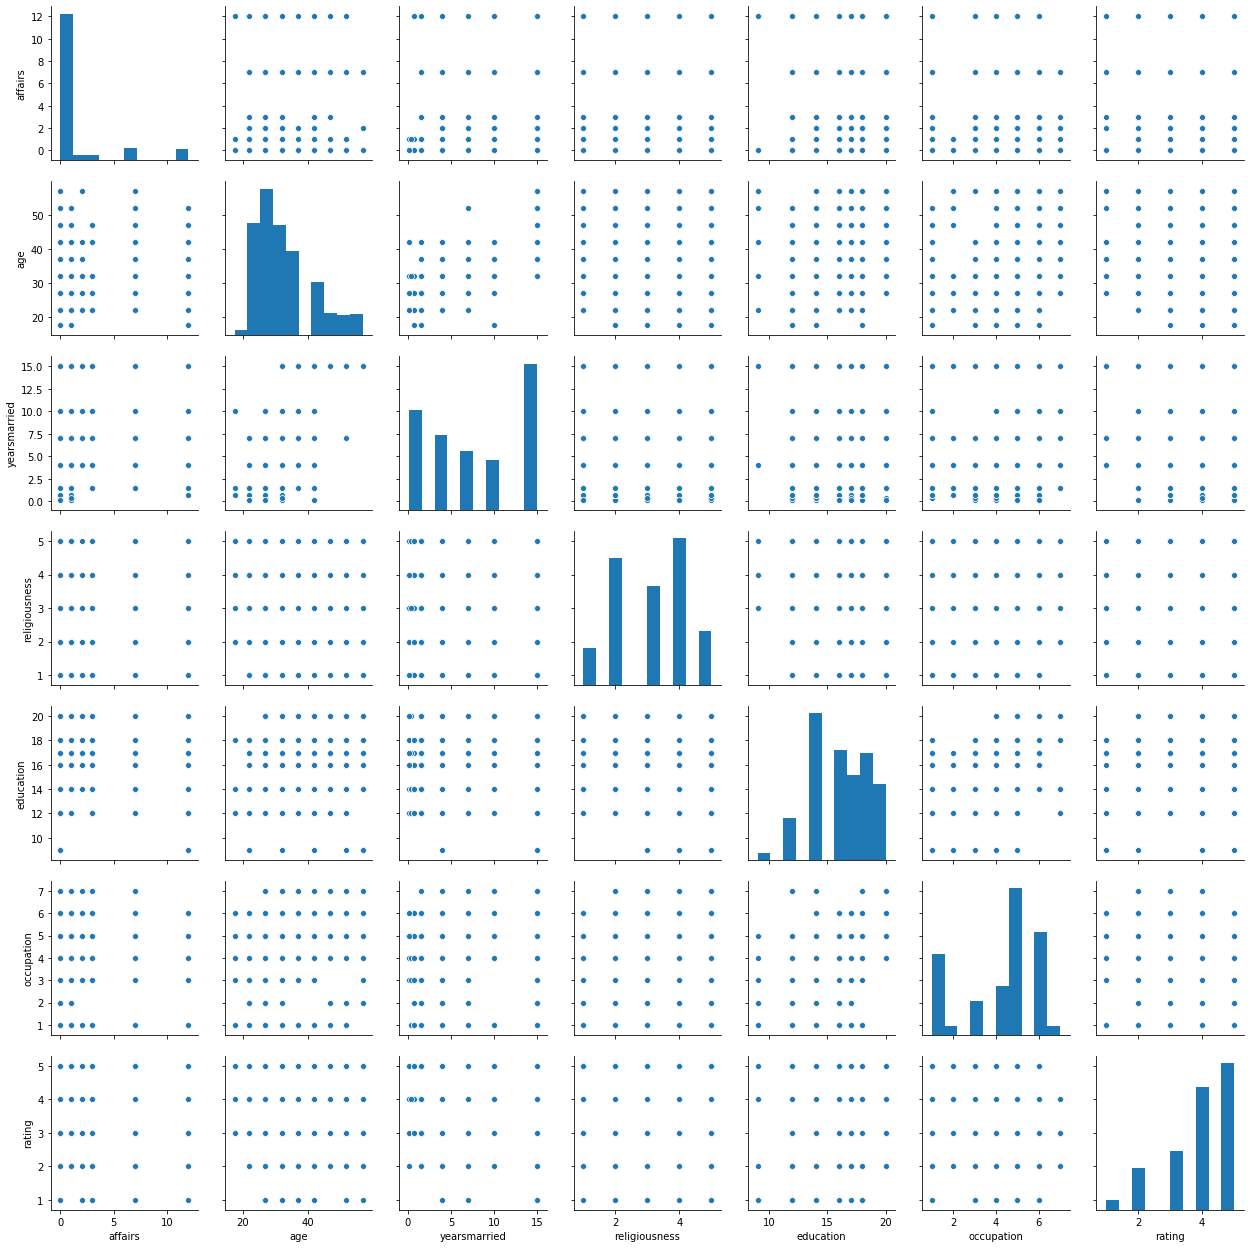

Optimization terminated successfully.
         Current function value: 0.511945
         Iterations 6


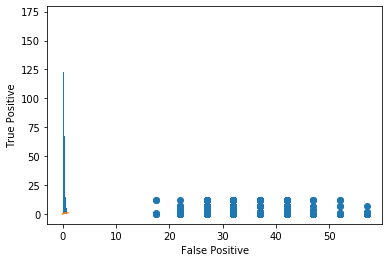

In [10]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt
'''
Question 1
I have a dataset containing family information of married couples, which have around 10 variables & 600+ observations. 
Independent variables are ~ gender, age, years married, children, religion etc.
I have one response variable which is number of extra marital affairs.
 Now, I want to know what all factor influence the chances of extra marital affair.
Since extra marital affair is a binary variable (either a person will have or not), 
so we can fit logistic regression model here to predict the probability of extra marital affair.
'''
#Importing Data
affairs = pd.read_csv("Affairs.csv")

affairs.isnull().sum()

#to check for linearity using pairplot
import seaborn as sns
sns.pairplot(affairs) #pair plot to see the correlation
plt.show()

affairs.corr() # to check the collineraity
plt.scatter(affairs.age,affairs.affairs)

affairs.columns
affairs.affairs.value_counts()

#for categorizing in 0 and 1 for logistic_regression
affairs["Att_val"] = np.zeros(601)
# converting the affairs to binary variable
affairs.loc[affairs.affairs >= 1,"Att_val"] = 1
affairs.drop(["affairs"],axis=1,inplace=True)

#encoding the string values
affairs.iloc[:,0:1].columns
affairs["gender"] = pd.get_dummies(affairs["gender"])
affairs["children"] = pd.get_dummies(affairs["children"])

#model for logistics regression
import statsmodels.formula.api as sm
logit_model = sm.logit('Att_val~age+yearsmarried+religiousness+rating',data = affairs).fit()

logit_model.summary()
y_pred = logit_model.predict(affairs)

y_pred_val = y_pred

affairs["y_pred"]=y_pred
plt.hist(y_pred)
affairs.loc[y_pred>=0.5,"y_pred"] = 1
affairs.loc[y_pred<0.5,"y_pred"] = 0

from sklearn.metrics import classification_report
classification_report(affairs.Att_val,affairs.y_pred)
#classificaion report
'''
u'              precision    recall  f1-score   support
         0.0       0.77      0.96      0.85       451
         1.0       0.54      0.15      0.23       150
   micro avg       0.76      0.76      0.76       601
   macro avg       0.65      0.55      0.54       601
weighted avg       0.71      0.76      0.70       601'
'''

# confusion matrix 
confusion_matrix = pd.crosstab(affairs['Att_val'],affairs.y_pred)
confusion_matrix

#y_pred   0.0  1.0
#Att_val          
#0.0      432   19
#1.0      128   22
accuracy = (432.00+22)/(432.00+22.00+128+19)
precision = 22.00/(128+22)
recall = 22.00/(22+19)
f1_score = 2*(precision*recall/(precision+recall))
#f1_score = 0.23

# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(affairs['Att_val'],y_pred_val)


# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr)